# DS-7331 Machine Learning Project 3
## Airbnb Clustering Tasks
### Allen Miller, Ana Glaser, Jake Harrison, Lola Awodipe

https://nbviewer.jupyter.org/github/allenmiller17/SMU_7331_ML1_Projects/blob/main/Project_2_Final_Team.ipynb

In [65]:
#loading libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

from sklearn import metrics as mt

from sklearn.cluster import KMeans

In [67]:
pdata = pd.read_csv("airbnb1.csv")

In [68]:
pdata['price'] = np.exp(pdata.log_price)

In [69]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30739 entries, 0 to 30738
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30739 non-null  int64  
 1   log_price               30739 non-null  float64
 2   property_type           30739 non-null  object 
 3   room_type               30739 non-null  object 
 4   accommodates            30739 non-null  int64  
 5   bathrooms               30645 non-null  float64
 6   bed_type                30739 non-null  object 
 7   cancellation_policy     30739 non-null  object 
 8   cleaning_fee            30739 non-null  bool   
 9   city                    30739 non-null  object 
 10  description             30739 non-null  object 
 11  first_review            24150 non-null  object 
 12  host_has_profile_pic    30648 non-null  object 
 13  host_identity_verified  30648 non-null  object 
 14  host_response_rate      23119 non-null

In [70]:
pdata.nunique()

id                        30739
log_price                   614
property_type                31
room_type                     3
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               30615
first_review               2234
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           76
host_since                 2902
instant_bookable              2
last_review                1132
latitude                  30731
longitude                 30713
neighbourhood               571
number_of_reviews           314
review_scores_rating         48
zipcode                     606
bedrooms                     11
beds                         17
price                       614
dtype: int64

In [71]:
#transforming the property type to a binary classification
value_list = ["Apartment","House","Condominium","Townhouse","Loft"]
boolean_series = ~pdata.property_type.isin(value_list)
filtered_df = pdata[boolean_series]

filtered_df.head(100)

for i in list (filtered_df.index):
    pdata.loc[i,'property_type'] = "other"

#transforming the longitude and latitude variables to East / West
pdata["region"] = pd.cut(pdata.longitude,[-200,-100,0],2,labels=["West","East"])

In [ ]:
#evaluating the data after transformation
pdata.head()

In [ ]:
#Encoding boolean and categorical variables
replaceStruct = {
                "cleaning_fee":     {True: 1, False: 0},
                "instant_bookable":     {"t": 1, "f": 0},
                "host_identity_verified":     {"t": 1, "f": 0},
                "property_type":     {"Apartment": 0,"House": 1,"Condominium": 2,"Townhouse": 3,"Loft": 4, "other": 5},
                "region": {"East": 0, "West": 1},
                "room_type": {"Entire home/apt": 0, "Private room": 1, "Shared room": 2},
                "bed_type": {"Real Bed": 0, "Futon": 1, "Pull-out Sofa": 2, "Couch": 3, "Airbed": 4},
                "city": {"NYC": 0, "SF": 1, "DC": 2, "LA": 3, "Chicago": 4, "Boston": 5},
                "cancellation_policy": {"strict": 0, "moderate": 1, "flexible": 2, "super_strict_30": 3, "super_strict_60": 4}
                    }

pdata=pdata.replace(replaceStruct)

In [72]:
#pdata.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude','neighbourhood','host_has_profile_pic'], axis=1, inplace=True)
pdata.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude','neighbourhood','host_has_profile_pic','cleaning_fee','instant_bookable','host_identity_verified','property_type','region','room_type','bed_type','city','cancellation_policy'], axis=1, inplace=True)

#pdata.drop(['cleaning_fee','instant_bookable','host_identity_verified','property_type','region','room_type','bed_type','city','cancellation_policy'])

In [ ]:
#evaluating the data after transformation
pdata.head()

In [ ]:
pdata.nunique()

In [73]:
pdata = pdata.dropna()

In [74]:
#Scale the data and deploy model

from scipy.stats import zscore

pdata_z = pdata.apply(zscore)

Text(0.5, 1.0, 'K Optimization Graph')

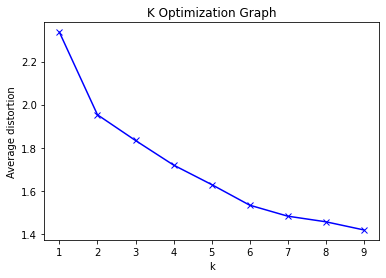

In [8]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(pdata_z)
    prediction=model.predict(pdata_z)
    meanDistortions.append(sum(np.min(cdist(pdata_z, model.cluster_centers_, 'euclidean'), axis=1)) / pdata_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('K Optimization Graph')

In [86]:
KNNModel = KMeans(n_clusters=5, n_init = 3, random_state=2345)
KNNModel.fit(pdata_z)
prediction=KNNModel.predict(pdata_z)
pdata_z["GROUP"] = prediction
pdata["GROUP"] = prediction

In [87]:
#Assess the distribution of clusters formed
pdata_z['GROUP'].value_counts()  

2    14130
1     4638
4     1991
3     1810
0     1117
Name: GROUP, dtype: int64

In [89]:
pdata_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23686 entries, 0 to 30735
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log_price             23686 non-null  float64
 1   accommodates          23686 non-null  float64
 2   bathrooms             23686 non-null  float64
 3   number_of_reviews     23686 non-null  float64
 4   review_scores_rating  23686 non-null  float64
 5   bedrooms              23686 non-null  float64
 6   beds                  23686 non-null  float64
 7   price                 23686 non-null  float64
 8   GROUP                 23686 non-null  int32  
dtypes: float64(8), int32(1)
memory usage: 1.7 MB


In [88]:
#centroids = KNNModel.cluster_centers_
#centroids

array([[ 2.00133521e+00,  2.71076687e+00,  2.69183905e+00,
        -1.05996696e-01,  5.57962103e-02,  2.68811606e+00,
         2.63038149e+00,  2.74234359e+00,  3.00000000e+00],
       [ 8.62261808e-01,  9.08229908e-01,  3.79237415e-01,
        -1.21081776e-01,  1.07921471e-01,  9.11161919e-01,
         8.24553773e-01,  5.91727819e-01,  4.00000000e+00],
       [-3.50283720e-01, -4.41690328e-01, -2.82075858e-01,
        -2.54344053e-01,  2.67220786e-01, -4.20365127e-01,
        -4.15159507e-01, -3.27351490e-01,  2.00000000e+00],
       [-5.26590970e-01, -3.16544872e-01, -1.55159448e-01,
        -4.36795497e-01, -2.42580301e+00, -3.02497213e-01,
        -2.49085163e-01, -3.75960071e-01,  1.77635684e-15],
       [-1.66761965e-01, -2.14096611e-01, -2.50686525e-01,
         2.54367499e+00,  2.61223476e-02, -3.72333206e-01,
        -2.23690881e-01, -2.51967422e-01,  1.00000000e+00]])

In [ ]:
pdata_z.head()

In [ ]:
pdata_z.nunique()

<Figure size 360x360 with 0 Axes>

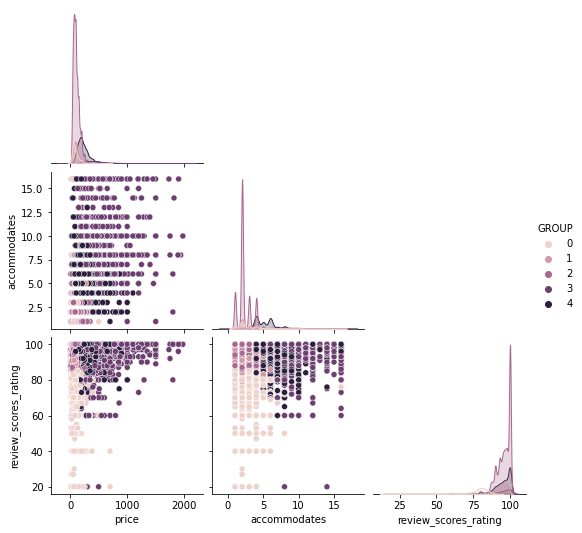

In [78]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html

plt.figure(figsize=(5,5))
sns.pairplot(pdata,vars=pdata[['price','accommodates','review_scores_rating']], hue = "GROUP" ,diag_kind = 'kde', corner = True)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=40)
labels = KNNModel.labels_
ax.scatter(pdata_z.iloc[:, 12], pdata_z.iloc[:,0], pdata_z.iloc[:,5],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Rating')
ax.set_ylabel('Log Price')
ax.set_zlabel('Bed Type')
ax.set_title('3D plot of KMeans Clustering')

In [79]:
import plotly.express as px

fig = px.scatter_3d(pdata, x='review_scores_rating', y='price', z='accommodates', color='GROUP')
fig.show()

In [80]:
dataset=pdata[:]  #creating a copy of the data 
dataset['KmeansLabel']=KNNModel.labels_

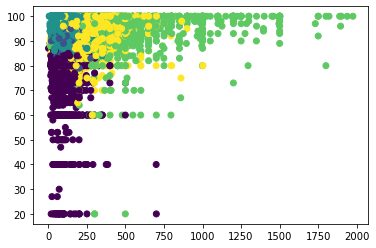

In [37]:
plt.scatter(dataset['price'], dataset['review_scores_rating'], c=KNNModel.labels_,)  
plt.show()

#pdata.boxplot(by="GROUP", figsize=(25, 25))

In [22]:
#fig1 = px.violin(pdata, y="price", x="accommodates", color="GROUP", box=True, points="all")
#fig1.show()

In [81]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [82]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

linkage_methods = ['single', 'complete', 'average', 'ward', 'median']

results_cophenetic_coef=[]

for i in linkage_methods :
    #plt.figure(figsize=(15,13))
    #plt.xlabel('sample index')
    #plt.ylabel('Distance')
    Z = linkage(pdata_z, i)
    cc, coph_dists = cophenet(Z , pdist(pdata_z))
    #dendrogram(Z,leaf_rotation=90.0, p=5, leaf_font_size=10, truncate_mode='level')
    #plt.tight_layout()
    #plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    #plt.show()
    results_cophenetic_coef.append((i,cc))
    #print (i,cc)

In [26]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,single,0.695817
1,complete,0.727901
2,average,0.888524
3,ward,0.643511
4,median,0.499919


In [27]:
# cophenet index 
Z = linkage(pdata_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(pdata_z))

c

0.8885241096724468

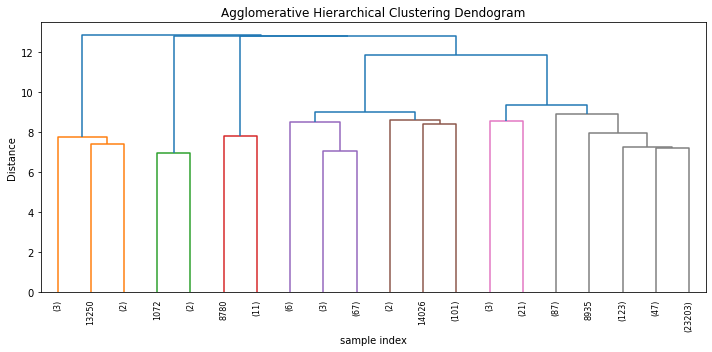

In [28]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()

In [ ]:
# cophenet index 
Z1 = linkage(pdata_z, metric='euclidean', method='ward')
c1, coph_dists1 = cophenet(Z1 , pdist(pdata_z))

c1

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - ward')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()

In [ ]:
# cophenet index 
Z2 = linkage(pdata_z, metric='euclidean', method='complete')
c2, coph_dists2 = cophenet(Z2 , pdist(pdata_z))

c2



In [ ]:

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - complete')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()


In [ ]:
# cophenet index 
Z3 = linkage(pdata_z, metric='euclidean', method='centroid')
c3, coph_dists3 = cophenet(Z3 , pdist(pdata_z))

c3



In [ ]:

plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram - centroid')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2, leaf_rotation=90., leaf_font_size=8. , truncate_mode = 'lastp',p=20)
plt.tight_layout()


In [ ]:
#evaluating categorical value count for one-hot-encoding
pdata_cls.nunique()

In [ ]:
#one hot encoding categorical variables and dropping columns that are not used
oneHotCols=["room_type","bed_type","city","cancellation_policy","region"]
pdata_cls.drop(['description','host_response_rate','first_review','host_since','last_review','zipcode','id','latitude','longitude','neighbourhood','cleaning_fee','host_has_profile_pic'], axis=1, inplace=True)
pdata_cls=pd.get_dummies(pdata_cls, columns=oneHotCols,drop_first=True)
pdata_cls.head(10)

In [ ]:
# Creating the X and y variables for the Classification Model
X_cls = pdata_cls.drop('property_type',axis=1).values     
y_cls = pdata_cls['property_type'].values

#Scaling the Classification input
yhat_cls = np.zeros(y_cls.shape) # we will fill this with predictions
scl_cls = StandardScaler()
X_scaled_cls = scl_cls.fit_transform(X_cls)

In [ ]:
#Describe the final dataset
pdata_cls.info()

In [38]:
max_d=5
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

In [39]:
set(clusters)  # So there are 3 clusters which are formed 

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42}

In [41]:
dataset['HierarchicalClusteringLabel']=clusters

In [100]:
from sklearn.metrics import silhouette_score
Kmeans_score =  silhouette_score(dataset.drop('KmeansLabel',axis=1),dataset['KmeansLabel'])
print("Kmeans silhouette : ", Kmeans_score)


Kmeans silhouette :  0.07414385620887572


In [45]:
Hierarchical_score = silhouette_score(dataset.drop('HierarchicalClusteringLabel',axis=1),dataset['HierarchicalClusteringLabel'])
print("Hierarchical silhouette ; ", Hierarchical_score)

Hierarchical silhouette ;  -0.40876838188054765


In [46]:
Kmeans_results=dataset.groupby('KmeansLabel').mean()
Kmeans_results

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,price,GROUP,HierarchicalClusteringLabel
KmeansLabel,,,,,,,,,,
0,4.394844,2.539779,1.140055,9.030939,74.999448,1.002210,1.422099,96.651381,0.0,38.277901
1,4.637160,2.762431,1.086389,132.180814,94.297338,0.943245,1.454545,113.728277,1.0,38.362632
2,4.513573,2.267799,1.068754,16.569639,96.194904,0.902689,1.209908,103.346001,2.0,39.000000
3,6.097194,9.119069,2.739481,22.699194,94.530886,3.527305,5.101164,526.119964,3.0,33.341987
4,5.330122,5.201596,1.440276,22.075895,94.941138,2.026951,2.793877,229.926261,4.0,38.843036


In [47]:
Hierarchical_results=dataset.groupby('HierarchicalClusteringLabel').mean()
Hierarchical_results

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,price,GROUP,KmeansLabel
HierarchicalClusteringLabel,,,,,,,,,,
1,3.891820,10.000000,0.000000,53.000000,79.500000,1.000000,15.000000,49.000000,4.000000,4.000000
2,3.912023,1.000000,2.000000,78.000000,94.000000,1.000000,16.000000,50.000000,4.000000,4.000000
3,3.800451,16.000000,3.250000,2.000000,95.000000,1.000000,16.000000,45.000000,3.000000,3.000000
4,6.476972,16.000000,1.000000,8.000000,100.000000,0.000000,16.000000,650.000000,3.000000,3.000000
5,5.956525,11.000000,3.000000,1.000000,20.000000,3.000000,6.500000,399.000000,3.000000,3.000000
6,5.703782,4.000000,2.000000,1.000000,20.000000,5.000000,13.000000,300.000000,3.000000,3.000000
7,3.949370,2.272727,8.000000,36.181818,90.181818,0.818182,2.636364,54.909091,3.000000,3.000000
8,3.496508,10.000000,6.500000,23.000000,78.000000,1.000000,10.000000,33.000000,3.000000,3.000000
9,6.482814,16.000000,3.500000,12.000000,99.000000,9.000000,15.500000,667.000000,3.000000,3.000000


In [64]:
DBScan_results=dataset.groupby('labelsDBScan').mean()
DBScan_results

,log_price,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,price,GROUP,KmeansLabel,HierarchicalClusteringLabel
labelsDBScan,,,,,,,,,,,
-1,5.215883,5.529066,1.725974,43.876101,89.950088,2.04678,3.111176,260.214132,2.552946,2.552946,37.116265
0,4.484529,2.218560,1.065374,16.593053,96.230899,1.00000,1.183485,100.524172,2.000000,2.000000,39.000000
1,4.578890,2.438183,1.014298,114.246426,94.627418,1.00000,1.251472,105.149706,1.000000,1.000000,39.000000
2,5.266106,4.686283,1.378452,17.401086,96.055681,2.00000,2.377546,205.898597,4.000000,4.000000,39.000000
3,4.329242,2.221116,1.036853,8.550797,79.985060,1.00000,1.204183,87.186255,0.000000,0.000000,39.000000
4,4.770820,2.365015,0.998834,16.784840,96.086880,0.00000,1.202332,126.860641,2.000000,2.000000,39.000000
5,5.430439,4.206522,1.021739,16.997283,96.440217,1.00000,2.263587,235.008152,4.000000,4.000000,39.000000
6,4.549111,3.342308,1.013462,11.515385,96.980769,2.00000,1.846154,97.892308,2.000000,2.000000,39.000000


### DBScan

In [95]:
from sklearn.cluster import DBSCAN

modelDBSCAN = DBSCAN(eps=0.99, min_samples=5).fit(pdata_z)
labelsDBSCAN = modelDBSCAN.labels_

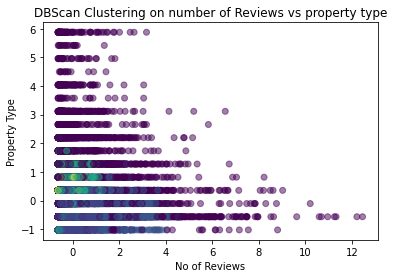

In [96]:
plt.scatter(pdata_z.number_of_reviews, pdata_z.accommodates,  c=labelsDBSCAN, alpha=0.5)
plt.title("DBScan Clustering on number of Reviews vs property type")
plt.xlabel("No of Reviews")
plt.ylabel("Property Type")
plt.show()

In [55]:
print(labelsDBSCAN)

[ 0 -1  5 ...  0  2 -1]


In [97]:
#Assess the distribution of clusters formed
pdata_z['labelsDBScan'] =   labelsDBSCAN
pdata['labelsDBScan'] =   labelsDBSCAN
dataset['labelsDBScan'] =   labelsDBSCAN

In [98]:
pdata_z['labelsDBScan'].value_counts()  

 2     7533
-1     6862
 8     2085
 1     1888
 6     1450
 3     1189
 4      722
 7      609
 11     336
 14     217
 5      184
 13     151
 12     123
 0      119
 9      113
 10     105
Name: labelsDBScan, dtype: int64

##### 2.3.2 K-Nearest Neighbors Classification

In [ ]:
get_ipython().run_line_magic('time', '')
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline


#pipe = make_pipeline(('scale', StandardScaler()),  ('knn', KNeighborsClassifier()))

pipe = Pipeline([('scale', StandardScaler()),  
                         ('knn', KNeighborsClassifier())]) 

# Define a range of hyper parameters for grid search
parameters = { 'knn__n_neighbors': [10,45,50]
              , 'knn__algorithm' : ["auto", "ball_tree", "kd_tree", "brute"]
             }

#Perform the grid search using accuracy as a metric during cross validation.
gridKnn = GridSearchCV(pipe, parameters, cv=cv, scoring='accuracy') # can try f1_micro, f1_maco accuracy....

#Use the best features from recursive feature elimination during the grid search
gridKnn.fit(X_train_scaled_cls, y_train_cls)

#display the best pipeline model identified during the grid search
gridKnn.best_estimator_

In [ ]:
gridKnn.best_params_

In [ ]:
KNNmodelFINAL = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 45) # get object
KNNmodelFINAL.fit(X_train_scaled_cls, y_train_cls)
KNNy_hat = KNNmodelFINAL.predict(X_test_scaled_cls)

In [ ]:
from sklearn.model_selection import cross_val_score
KNNaccuracies = cross_val_score(KNNmodelFINAL, X_scaled_cls, y=y_cls, cv=cv) # this also can help with parallelism
print(KNNaccuracies)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Training accuracy",round(KNNmodelFINAL.score(X_train_scaled_cls,y_train_cls),ndigits=3))
print()
print("Testing accuracy",round(mt.accuracy_score(y_test_cls, KNNy_hat),ndigits=3))
print()
print('Confusion Matrix')
print(draw_cm(y_test_cls,KNNy_hat))

print(classification_report(y_test_cls,KNNy_hat))

In [ ]:
KNN_ac = round(mt.accuracy_score(y_test_cls, KNNy_hat),ndigits=3)

print(KNN_ac)

<AxesSubplot:xlabel='HierarchicalClusteringLabel'>

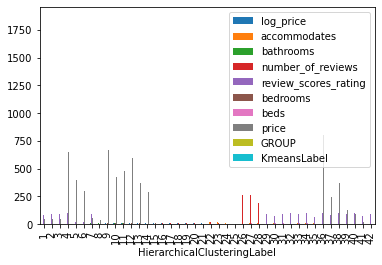

In [84]:
Kmeans_results.plot.bar()

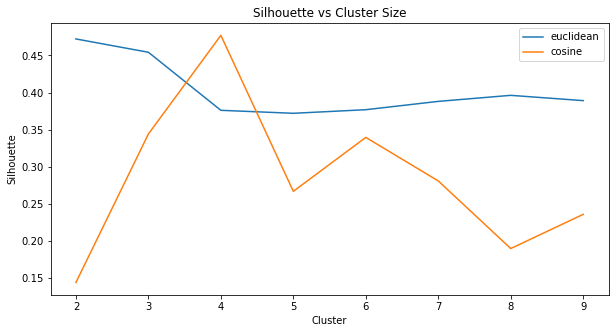

In [103]:
# referenced from class example
from sklearn import metrics
from sklearn.cluster import KMeans

seuclid = []
scosine = []
k = range(2,10)
for i in k:
    kmeans_model = KMeans(n_clusters=i, init="k-means++").fit(pdata_z)
    labels = kmeans_model.labels_
    seuclid.append(metrics.silhouette_score(pdata_z, labels, metric='euclidean'))
    scosine.append(metrics.silhouette_score(pdata_z, labels, metric='cosine'))
    
plt.figure(figsize=(10,5))
plt.plot(k,seuclid,label='euclidean')
plt.plot(k,scosine,label='cosine')
plt.ylabel("Silhouette")
plt.xlabel("Cluster")
plt.title("Silhouette vs Cluster Size")
plt.legend()
plt.show()